- Exercici 1
Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

Per identificar les variables dels registres log hem seguit aquest recurs: https://en.wikipedia.org/wiki/Common_Log_Format

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib as plt
import seaborn as sns

In [3]:
logs_df = pd.read_csv('C:\\Users\\formacio\\Gabriel De Santis\\Data-Science-main\\Data-sources\\Web_access_log-akumenius.com.txt', sep='\n', encoding='utf-8', header=None)
logs_df[::10000]

,0
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
10000,www.akumenius.com 144.76.95.232 - - [23/Feb/20...
20000,www.akumenius.com 180.76.5.171 - - [23/Feb/201...
30000,www.akumenius.com 157.56.92.146 - - [23/Feb/20...
40000,www.akumenius.com 66.249.76.216 - - [23/Feb/20...
50000,www.akumenius.com 87.221.174.146 - - [24/Feb/2...
60000,www.akumenius.com 83.37.239.190 - - [24/Feb/20...
70000,www.akumenius.com 83.61.241.37 - - [24/Feb/201...
80000,www.akumenius.com 66.249.76.216 - - [24/Feb/20...
90000,www.akumenius.com 31.4.182.223 - - [25/Feb/201...


In [4]:
logs_df.shape

(261873, 1)

In [5]:
logs = logs_df.copy(deep=True)
logs.head()

,0
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...


A continuació, anirem creant columnes per les diferents variables dels registres

In [6]:
logs = logs[0].str.split(r'\s', n=1, expand=True)

In [7]:
logs.head()

,0,1
0,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OP..."
1,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OP..."
2,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OP..."
3,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OP..."
4,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OP..."


In [8]:
ip = logs[1].str.split(r'\s', n=1, expand=True)
logs[2] = ip[1]
logs[1] = ip[0]
logs.head()

,0,1,2
0,localhost,127.0.0.1,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
1,localhost,127.0.0.1,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
2,localhost,127.0.0.1,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
3,localhost,127.0.0.1,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
4,localhost,127.0.0.1,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."


In [9]:
user_identifier = logs[2].str.split(r'\s', n=1, expand=True)
logs[3] = user_identifier[1]
logs[2] = user_identifier[0]
logs.head()

,0,1,2,3
0,localhost,127.0.0.1,-,"- [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP..."
1,localhost,127.0.0.1,-,"- [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP..."
2,localhost,127.0.0.1,-,"- [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP..."
3,localhost,127.0.0.1,-,"- [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP..."
4,localhost,127.0.0.1,-,"- [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP..."


In [10]:
user_id = logs[3].str.split(r'\s\[', n=1, expand=True)
logs[4] = user_id[1]
logs[3] = user_id[0]
logs.head()

,0,1,2,3,4
0,localhost,127.0.0.1,-,-,"23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1...."
1,localhost,127.0.0.1,-,-,"23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1...."
2,localhost,127.0.0.1,-,-,"23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1...."
3,localhost,127.0.0.1,-,-,"23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1...."
4,localhost,127.0.0.1,-,-,"23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1...."


In [11]:
date = logs[4].str.split(r'\]\s', n=1, expand=True)
logs[5] = date[1]
logs[4] = date[0]
logs.head()

,0,1,2,3,4,5
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (intern..."
1,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (intern..."
2,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (intern..."
3,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (intern..."
4,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (intern..."


In [12]:
request = logs[5].str.split(r'"\s', n=1, expand=True)
logs[6] = request[1]
logs[5] = request[0]
logs.head()

,0,1,2,3,4,5,6
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0","200 - ""-"" ""Apache (internal dummy connection)""..."
1,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0","200 - ""-"" ""Apache (internal dummy connection)""..."
2,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0","200 - ""-"" ""Apache (internal dummy connection)""..."
3,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0","200 - ""-"" ""Apache (internal dummy connection)""..."
4,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0","200 - ""-"" ""Apache (internal dummy connection)""..."


In [13]:
http_status = logs[6].str.split(r'\s', n=1, expand=True)
logs[7] = http_status[1]
logs[6] = http_status[0]
logs.head()

,0,1,2,3,4,5,6,7
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,"- ""-"" ""Apache (internal dummy connection)"" VLOG=-"
1,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,"- ""-"" ""Apache (internal dummy connection)"" VLOG=-"
2,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,"- ""-"" ""Apache (internal dummy connection)"" VLOG=-"
3,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,"- ""-"" ""Apache (internal dummy connection)"" VLOG=-"
4,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,"- ""-"" ""Apache (internal dummy connection)"" VLOG=-"


In [14]:
size_return = logs[7].str.split(r'\s', n=1, expand=True)
logs[8] = size_return[1]
logs[7] = size_return[0]

In [15]:
logs[::10]

,0,1,2,3,4,5,6,7,8
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""-"" ""Apache (internal dummy connection)"" VLOG=-"
10,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""-"" ""Apache (internal dummy connection)"" VLOG=-"
20,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""-"" ""Apache (internal dummy connection)"" VLOG=-"
30,www.akumenius.com,66.249.76.216,-,-,23/Feb/2014:03:10:46 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +..."
40,www.akumenius.com,66.249.76.216,-,-,23/Feb/2014:03:11:01 +0100,"""GET /hoteles-baratos/ofertas-hotel-Venetur-Ho...",404,3100,"""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +..."
...,...,...,...,...,...,...,...,...,...
261830,www.akumenius.com,83.45.25.198,-,-,02/Mar/2014:02:48:10 +0100,"""GET / HTTP/1.1",200,7528,"""http://www.akumenius.com/chollos"" ""Mozilla/5...."
261840,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:02:50:53 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,19052,"""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +..."
261850,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:02:57:46 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,6397,"""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +..."
261860,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:03:05:09 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,9157,"""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +..."


In [16]:
logs[8].replace('"-"\s', '', regex=True, inplace=True)
logs[::10]

,0,1,2,3,4,5,6,7,8
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
10,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
20,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
30,www.akumenius.com,66.249.76.216,-,-,23/Feb/2014:03:10:46 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
40,www.akumenius.com,66.249.76.216,-,-,23/Feb/2014:03:11:01 +0100,"""GET /hoteles-baratos/ofertas-hotel-Venetur-Ho...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
...,...,...,...,...,...,...,...,...,...
261830,www.akumenius.com,83.45.25.198,-,-,02/Mar/2014:02:48:10 +0100,"""GET / HTTP/1.1",200,7528,"""http://www.akumenius.com/chollos"" ""Mozilla/5...."
261840,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:02:50:53 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,19052,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
261850,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:02:57:46 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,6397,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
261860,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:03:05:09 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,9157,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."


In [17]:
logs.shape

(261873, 9)

In [18]:
logs_df.shape

(261873, 1)

In [19]:
logs_df = logs
logs_df

,0,1,2,3,4,5,6,7,8
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
1,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
2,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
3,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
4,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,-,-,02/Mar/2014:03:05:39 +0100,"""GET / HTTP/1.1",200,7528,"""Mozilla/5.0 (compatible; YandexBot/3.0; +http..."
261869,www.akumenius.com,74.86.158.107,-,-,02/Mar/2014:03:09:52 +0100,"""HEAD / HTTP/1.1",200,-,"""Mozilla/5.0+(compatible; UptimeRobot/2.0; htt..."
261870,localhost,127.0.0.1,-,-,02/Mar/2014:03:10:18 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
261871,localhost,127.0.0.1,-,-,02/Mar/2014:03:10:18 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"


In [20]:
logs_df.columns = ['HTTP', 'IP', 'USER_IDENTIFIER', 'USER_ID', 'DATE', 'REQUEST', 'HTTP_STATUS', 'SIZE_RETURN', 'USER_AGENT']
logs_df[::10]

,HTTP,IP,USER_IDENTIFIER,USER_ID,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
10,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
20,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
30,www.akumenius.com,66.249.76.216,-,-,23/Feb/2014:03:10:46 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
40,www.akumenius.com,66.249.76.216,-,-,23/Feb/2014:03:11:01 +0100,"""GET /hoteles-baratos/ofertas-hotel-Venetur-Ho...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
...,...,...,...,...,...,...,...,...,...
261830,www.akumenius.com,83.45.25.198,-,-,02/Mar/2014:02:48:10 +0100,"""GET / HTTP/1.1",200,7528,"""http://www.akumenius.com/chollos"" ""Mozilla/5...."
261840,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:02:50:53 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,19052,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
261850,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:02:57:46 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,6397,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
261860,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:03:05:09 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,9157,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."


- Exercici 2
Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

In [21]:
logs_df.USER_IDENTIFIER.unique()

array(['-'], dtype=object)

In [22]:
logs_df.USER_ID.unique()

array(['-', 'clarcat'], dtype=object)

Com podem apreciar, aquestes dues variables no recullen dades substancials, així que les eliminarem.

Entenem també que les dades "-" que apareixen en la variable "SIZE_RETURN" corresponen al fet de que no hi ha hagut cap tipus de retorn

In [23]:
logs_df.drop(['USER_ID', 'USER_IDENTIFIER'], axis=1, inplace=True)
logs_df.head()

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"


Entenem que els valors "-" a SIZE_RETURN corresponen al fet de que l'objecte retornat al client no pesaven res o bé que no hi ha hagut cap tipus de retorn, aleshores considerem convenient considerar aquest valors com a objectes de 0 bytes.

In [24]:
logs_df.SIZE_RETURN = logs_df.SIZE_RETURN.replace('-', 0)
logs_df.head()

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-"
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-"
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-"
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-"
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-"


In [25]:
logs_df.SIZE_RETURN.unique()

array([0, '3100', '8811', ..., '18227', '39333', '19052'], dtype=object)

In [26]:
logs_df.HTTP.nunique()

5

In [27]:
logs_df.HTTP.unique()

array(['localhost', 'www.akumenius.com', 'akumenius.com', 'akumenius.es',
       'test.akumenius.com'], dtype=object)

In [28]:
logs_df.REQUEST.nunique()

66764

In [29]:
logs_df.HTTP_STATUS.nunique()

12

In [30]:
logs_df.HTTP_STATUS.unique()

array(['200', '404', '304', '502', '301', '403', '408', '400', '206',
       '401', '302', '500'], dtype=object)

In [31]:
logs_df.SIZE_RETURN.nunique()

15548

In [32]:
logs_df.USER_AGENT.nunique()

4781

In [33]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   HTTP         261873 non-null  object
 1   IP           261873 non-null  object
 2   DATE         261873 non-null  object
 3   REQUEST      261873 non-null  object
 4   HTTP_STATUS  261873 non-null  object
 5   SIZE_RETURN  261873 non-null  object
 6   USER_AGENT   261873 non-null  object
dtypes: object(7)
memory usage: 14.0+ MB


In [34]:
logs_df.HTTP_STATUS.unique()

array(['200', '404', '304', '502', '301', '403', '408', '400', '206',
       '401', '302', '500'], dtype=object)

- MIRAR A VER QUÉ HACEMOS CON EL RESTO DE VARIABLES

Transformarem les variables IP a strings per poderles processar amb GeoIp2 més endavant.

In [35]:
#logs_df.SIZE_RETURN = logs_df.SIZE_RETURN.astype('float64')
#logs_df.HTTP_STATUS = logs_df.HTTP_STATUS.astype('category')
logs_df.IP = logs_df.IP.astype('string')
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   HTTP         261873 non-null  object
 1   IP           261873 non-null  string
 2   DATE         261873 non-null  object
 3   REQUEST      261873 non-null  object
 4   HTTP_STATUS  261873 non-null  object
 5   SIZE_RETURN  261873 non-null  object
 6   USER_AGENT   261873 non-null  object
dtypes: object(6), string(1)
memory usage: 14.0+ MB


- Exercici 3
Geolocalitza les IP's.

Per geolocalitzar les IPs hem fet servir geoIp2 y una base de dades gratuita extreta de https://dev.maxmind.com/geoip/geolite2-free-geolocation-data

In [36]:
import geoip2.database

#reader = geoip2.database.Reader('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\bases_datos\\GeoLite2-City_20210629\\GeoLite2-City.mmdb')
reader = geoip2.database.Reader('C:\\Users\\formacio\\Gabriel De Santis\\Datasets\\GeoLite2-City_20210629\\GeoLite2-City.mmdb')

- VER SI ASIGNAMOS NONE O NULL O QUÉ

In [37]:
def country(ip):
    
    try:
        country = reader.city(ip).country.name
    except:
        country = None
    
    return country

logs_df['COUNTRY'] = logs_df.IP.apply(lambda x: country(x))


logs_df[200:208]

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT,COUNTRY
200,www.akumenius.com,180.76.5.31,23/Feb/2014:03:15:03 +0100,"""GET /destinos-baratos/destinos-caracteristica...",200,8360,"""Mozilla/5.0 (compatible; Baiduspider/2.0; +ht...",China
201,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:03 +0100,"""GET /hoteles-baratos/ofertas-hotel-Capitolio-...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
202,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8812,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
203,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /hoteles-baratos/ofertas-hotel-Guitart-Te...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
204,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:08 +0100,"""GET /hoteles-baratos/ofertas-hotel-Sol-Palmer...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
205,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:10 +0100,"""GET /hoteles-baratos/ofertas-hotel-The-Suites...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
206,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /hoteles-baratos/ofertas-hotel-Punta-Sere...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
207,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States


In [38]:
def city(ip):
    
    try:
        city = reader.city(ip).city.name
    except:
        city = None
    
    return city

logs_df['CITY'] = logs_df.IP.apply(lambda x: city(x))


logs_df[200:208]

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT,COUNTRY,CITY
200,www.akumenius.com,180.76.5.31,23/Feb/2014:03:15:03 +0100,"""GET /destinos-baratos/destinos-caracteristica...",200,8360,"""Mozilla/5.0 (compatible; Baiduspider/2.0; +ht...",China,None
201,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:03 +0100,"""GET /hoteles-baratos/ofertas-hotel-Capitolio-...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None
202,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8812,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None
203,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /hoteles-baratos/ofertas-hotel-Guitart-Te...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None
204,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:08 +0100,"""GET /hoteles-baratos/ofertas-hotel-Sol-Palmer...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None
205,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:10 +0100,"""GET /hoteles-baratos/ofertas-hotel-The-Suites...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None
206,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /hoteles-baratos/ofertas-hotel-Punta-Sere...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None
207,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None


In [39]:
def latitude(ip):
    
    try:
        latitude = reader.city(ip).location.latitude
    except:
        latitude = np.nan
    
    return latitude

logs_df['LATITUDE'] = logs_df.IP.apply(lambda x: latitude(x))


logs_df[200:208]

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT,COUNTRY,CITY,LATITUDE
200,www.akumenius.com,180.76.5.31,23/Feb/2014:03:15:03 +0100,"""GET /destinos-baratos/destinos-caracteristica...",200,8360,"""Mozilla/5.0 (compatible; Baiduspider/2.0; +ht...",China,None,34.7732
201,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:03 +0100,"""GET /hoteles-baratos/ofertas-hotel-Capitolio-...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510
202,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8812,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510
203,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /hoteles-baratos/ofertas-hotel-Guitart-Te...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510
204,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:08 +0100,"""GET /hoteles-baratos/ofertas-hotel-Sol-Palmer...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510
205,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:10 +0100,"""GET /hoteles-baratos/ofertas-hotel-The-Suites...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510
206,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /hoteles-baratos/ofertas-hotel-Punta-Sere...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510
207,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510


In [40]:
def longitude(ip):
    
    try:
        longitude = reader.city(ip).location.longitude
    except:
        longitude = np.nan
    
    return longitude

logs_df['LONGITUDE'] = logs_df.IP.apply(lambda x: longitude(x))


logs_df[200:208]

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT,COUNTRY,CITY,LATITUDE,LONGITUDE
200,www.akumenius.com,180.76.5.31,23/Feb/2014:03:15:03 +0100,"""GET /destinos-baratos/destinos-caracteristica...",200,8360,"""Mozilla/5.0 (compatible; Baiduspider/2.0; +ht...",China,None,34.7732,113.722
201,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:03 +0100,"""GET /hoteles-baratos/ofertas-hotel-Capitolio-...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822
202,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8812,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822
203,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /hoteles-baratos/ofertas-hotel-Guitart-Te...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822
204,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:08 +0100,"""GET /hoteles-baratos/ofertas-hotel-Sol-Palmer...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822
205,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:10 +0100,"""GET /hoteles-baratos/ofertas-hotel-The-Suites...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822
206,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /hoteles-baratos/ofertas-hotel-Punta-Sere...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822
207,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822


In [41]:
logs_df.head()

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT,COUNTRY,CITY,LATITUDE,LONGITUDE
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-",None,None,NaN,NaN
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-",None,None,NaN,NaN
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-",None,None,NaN,NaN
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-",None,None,NaN,NaN
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-",None,None,NaN,NaN


In [42]:
logs_df[logs_df['IP'] == '127.0.0.1'].count()

HTTP           13892
IP             13892
DATE           13892
REQUEST        13892
HTTP_STATUS    13892
SIZE_RETURN    13892
USER_AGENT     13892
COUNTRY            0
CITY               0
LATITUDE           0
LONGITUDE          0
dtype: int64

In [43]:
logs_df[logs_df.LATITUDE.isnull()].count()

HTTP           13892
IP             13892
DATE           13892
REQUEST        13892
HTTP_STATUS    13892
SIZE_RETURN    13892
USER_AGENT     13892
COUNTRY            0
CITY               0
LATITUDE           0
LONGITUDE          0
dtype: int64

In [44]:
logs_df.count()

HTTP           261873
IP             261873
DATE           261873
REQUEST        261873
HTTP_STATUS    261873
SIZE_RETURN    261873
USER_AGENT     261873
COUNTRY        247049
CITY           164934
LATITUDE       247981
LONGITUDE      247981
dtype: int64

In [45]:
logs_df.isna().sum() / len(logs_df) * 100

HTTP            0.000000
IP              0.000000
DATE            0.000000
REQUEST         0.000000
HTTP_STATUS     0.000000
SIZE_RETURN     0.000000
USER_AGENT      0.000000
COUNTRY         5.660759
CITY           37.017562
LATITUDE        5.304862
LONGITUDE       5.304862
dtype: float64

In [46]:
logs_df.drop(index=logs_df[logs_df['IP'] == '127.0.0.1'].index, axis=0, inplace=True)

In [47]:
logs_df.isna().sum() / len(logs_df) * 100

HTTP            0.000000
IP              0.000000
DATE            0.000000
REQUEST         0.000000
HTTP_STATUS     0.000000
SIZE_RETURN     0.000000
USER_AGENT      0.000000
COUNTRY         0.375835
CITY           33.489259
LATITUDE        0.000000
LONGITUDE       0.000000
dtype: float64

- Exercici 3
Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

In [48]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247981 entries, 22 to 261869
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   HTTP         247981 non-null  object 
 1   IP           247981 non-null  string 
 2   DATE         247981 non-null  object 
 3   REQUEST      247981 non-null  object 
 4   HTTP_STATUS  247981 non-null  object 
 5   SIZE_RETURN  247981 non-null  object 
 6   USER_AGENT   247981 non-null  object 
 7   COUNTRY      247049 non-null  object 
 8   CITY         164934 non-null  object 
 9   LATITUDE     247981 non-null  float64
 10  LONGITUDE    247981 non-null  float64
dtypes: float64(2), object(8), string(1)
memory usage: 22.7+ MB


In [49]:
logs_df.LONGITUDE.nunique()

771

In [50]:
logs_df.LONGITUDE.count()

247981

In [51]:
logs_df.LATITUDE.nunique()

772

In [52]:
logs_df.LATITUDE.count()

247981

In [53]:
geoloc_df = logs_df.copy(deep=True)

In [54]:
geoloc_df.LATITUDE = geoloc_df.LATITUDE.astype('string')
geoloc_df.LONGITUDE = geoloc_df.LONGITUDE.astype('string')
geoloc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247981 entries, 22 to 261869
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   HTTP         247981 non-null  object
 1   IP           247981 non-null  string
 2   DATE         247981 non-null  object
 3   REQUEST      247981 non-null  object
 4   HTTP_STATUS  247981 non-null  object
 5   SIZE_RETURN  247981 non-null  object
 6   USER_AGENT   247981 non-null  object
 7   COUNTRY      247049 non-null  object
 8   CITY         164934 non-null  object
 9   LATITUDE     247981 non-null  string
 10  LONGITUDE    247981 non-null  string
dtypes: object(8), string(3)
memory usage: 22.7+ MB


In [55]:
geoloc_df['LOCS'] = geoloc_df.LONGITUDE + ', ' + geoloc_df.LATITUDE
geoloc_df.head()

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT,COUNTRY,CITY,LATITUDE,LONGITUDE,LOCS
22,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:31 +0100,"""GET /hoteles-baratos/ofertas-hotel-Club-&-Hot...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.751,-97.822,"-97.822, 37.751"
23,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:33 +0100,"""GET /hoteles-baratos/ofertas-hotel-Metropolis...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.751,-97.822,"-97.822, 37.751"
24,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:35 +0100,"""GET /hoteles-baratos/ofertas-hotel-Faena-Hote...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.751,-97.822,"-97.822, 37.751"
25,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:38 +0100,"""GET /hoteles-baratos/ofertas-hotel-Kensington...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.751,-97.822,"-97.822, 37.751"
26,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:39 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8811,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.751,-97.822,"-97.822, 37.751"


In [56]:
geoloc_df.LOCS.nunique()

774

In [57]:
logs_df.IP.nunique()

2920

In [58]:
logs_df.IP.count()


247981

In [59]:
logs_df.COUNTRY.nunique()

66

In [60]:
logs_df[logs_df.IP == '66.249.93.141']

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT,COUNTRY,CITY,LATITUDE,LONGITUDE
6774,www.akumenius.com,66.249.93.141,23/Feb/2014:08:26:38 +0100,"""GET /hoteles-baratos/ofertas-hotel-Castillo-d...",404,3100,"""http://www.google.com/search"" ""Mozilla/5.0 (X...",None,None,47.0,8.0
6775,www.akumenius.com,66.249.93.141,23/Feb/2014:08:26:39 +0100,"""GET /modules/raton/views/themes/bcoos/css/but...",200,49,"""http://www.akumenius.com/hoteles-baratos/ofer...",None,None,47.0,8.0
6776,www.akumenius.com,66.249.93.141,23/Feb/2014:08:26:39 +0100,"""GET /modules/raton/views/themes/bcoos/css/2co...",200,2754,"""http://www.akumenius.com/hoteles-baratos/ofer...",None,None,47.0,8.0
6777,www.akumenius.com,66.249.93.141,23/Feb/2014:08:26:39 +0100,"""GET /modules/raton/views/themes/bcoos/images/...",200,3770,"""http://www.akumenius.com/hoteles-baratos/ofer...",None,None,47.0,8.0
6778,www.akumenius.com,66.249.93.141,23/Feb/2014:08:26:38 +0100,"""GET /hoteles-baratos/ofertas-hotel-Castillo-d...",404,3100,"""http://www.google.com/search"" ""Mozilla/5.0 (X...",None,None,47.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
247088,www.akumenius.com,66.249.93.141,01/Mar/2014:10:18:41 +0100,"""GET /modules/raton/views/themes/bcoos/images/...",200,338,"""http://www.akumenius.com/hoteles-baratos/ofer...",None,None,47.0,8.0
247089,www.akumenius.com,66.249.93.141,01/Mar/2014:10:18:41 +0100,"""GET /modules/raton/views/themes/bcoos/images/...",200,339,"""http://www.akumenius.com/hoteles-baratos/ofer...",None,None,47.0,8.0
247090,www.akumenius.com,66.249.93.141,01/Mar/2014:10:18:41 +0100,"""GET /modules/raton/views/themes/bcoos/images/...",200,3745,"""http://www.akumenius.com/hoteles-baratos/ofer...",None,None,47.0,8.0
247091,www.akumenius.com,66.249.93.141,01/Mar/2014:10:18:41 +0100,"""GET /modules/raton/views/themes/bcoos/images/...",200,8158,"""http://www.akumenius.com/hoteles-baratos/ofer...",None,None,47.0,8.0


In [61]:
logs_df[logs_df.COUNTRY.isna()].IP.unique()

<StringArray>
[  '198.36.87.81',  '66.249.93.141',  '66.249.82.148', '204.104.55.244',
  '66.249.81.141',  '66.249.93.169']
Length: 6, dtype: string

LONG TO WIDE DATAFRAME

In [64]:
logs_df.head()

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT,COUNTRY,CITY,LATITUDE,LONGITUDE
22,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:31 +0100,"""GET /hoteles-baratos/ofertas-hotel-Club-&-Hot...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.751,-97.822
23,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:33 +0100,"""GET /hoteles-baratos/ofertas-hotel-Metropolis...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.751,-97.822
24,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:35 +0100,"""GET /hoteles-baratos/ofertas-hotel-Faena-Hote...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.751,-97.822
25,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:38 +0100,"""GET /hoteles-baratos/ofertas-hotel-Kensington...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.751,-97.822
26,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:39 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8811,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.751,-97.822


In [65]:
wide_df = logs_df[['IP', 'COUNTRY', 'CITY', 'LATITUDE', 'LONGITUDE']]

In [66]:
wide_df.head()

,IP,COUNTRY,CITY,LATITUDE,LONGITUDE
22,66.249.76.216,United States,None,37.751,-97.822
23,66.249.76.216,United States,None,37.751,-97.822
24,66.249.76.216,United States,None,37.751,-97.822
25,66.249.76.216,United States,None,37.751,-97.822
26,66.249.76.216,United States,None,37.751,-97.822


In [90]:
wide_df['count2'] = 1

<ipython-input-90-b4d17c4473f6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
wide_df.columns

Index(['IP', 'COUNTRY', 'CITY', 'LATITUDE', 'LONGITUDE', 'COUNT', 'count2'], dtype='object')

In [99]:
mapa = wide_df.groupby(['IP', 'COUNTRY', 'CITY', 'LATITUDE', 'LONGITUDE'], dropna=False).count().reset_index()

In [76]:
wide_df['COUNT'] = 1

<ipython-input-76-922e52db178e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
wide_df.head()

,IP,COUNTRY,CITY,LATITUDE,LONGITUDE,COUNT
22,66.249.76.216,United States,None,37.751,-97.822,1
23,66.249.76.216,United States,None,37.751,-97.822,1
24,66.249.76.216,United States,None,37.751,-97.822,1
25,66.249.76.216,United States,None,37.751,-97.822,1
26,66.249.76.216,United States,None,37.751,-97.822,1


In [86]:
wide_df['COUNT'] = wide_df.groupby('IP').IP.transform('count')

<ipython-input-86-3eca599c7afc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
wide_df.drop_duplicates(subset='IP', inplace=True)

<ipython-input-106-12f92f13e486>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
wide_df.head()

,IP,COUNTRY,CITY,LATITUDE,LONGITUDE,COUNT,count2
22,66.249.76.216,United States,None,37.7510,-97.8220,46382,1
36,5.255.253.53,Russia,None,55.7386,37.6068,249,1
41,157.55.35.112,United States,None,37.7510,-97.8220,131,1
44,193.111.141.116,Germany,Düsseldorf,51.2705,6.8144,7,1
68,5.10.83.71,Netherlands,Amsterdam,52.3759,4.8975,115,1


In [101]:
#https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html

import plotly.express as px

In [108]:
#fig = px.scatter_mapbox(logs_df, lat='LATITUDE', lon='LONGITUDE', color_discrete_sequence=["fuchsia"])

fig = px.scatter_geo(wide_df, lat='LATITUDE', lon='LONGITUDE', projection='natural earth', size='COUNT')

#render_mode='webgl'
#fig.update_layout(mapbox_style="open-street-map")
fig.show()

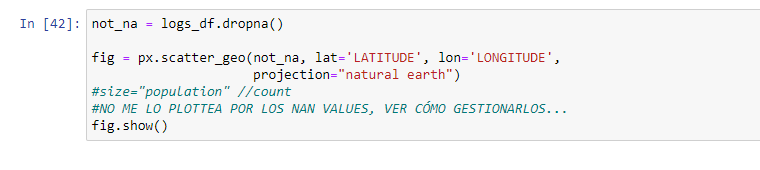

- lo que te com3ento es que los imputes según el dato más proximo a el, ya sea hacia atrás (back-fill) o bien hacia delante (forward-fill)